In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,recall_score,precision_score, classification_report, roc_curve, roc_auc_score

In [2]:
from sklearn.datasets import load_wine
data = load_wine()

In [3]:
print(data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
y = data["target"]

In [5]:
X = data["data"]

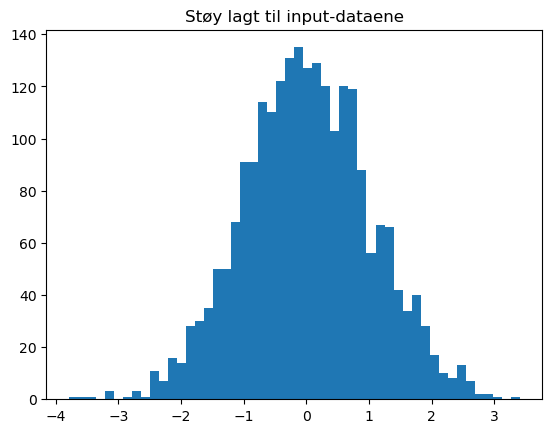

In [23]:
stoy = np.random.normal(loc=0, scale=1, size=X.shape)
plt.title("Støy lagt til input-dataene")
plt.hist(stoy.flatten(), bins=50)
plt.show()

In [ ]:
X_stoy = X + stoy

## 1. Lag en dataframe og legg til korrekte variabel-navn

In [7]:
data["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
df = pd.DataFrame(X_stoy, columns= data["feature_names"])

In [9]:
df["Target"] = y

In [10]:
df["TargetNames"]= df["Target"].map({0:data["target_names"][0],1:data["target_names"][1],2:data["target_names"][2]})

In [11]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,TargetNames
0,11.750064,1.191416,2.232913,16.205592,127.070147,1.698675,3.408239,0.567171,0.710353,5.355556,-0.221477,4.914797,1065.761199,0,class_0
1,13.013348,2.312307,1.556482,12.827399,98.995425,3.307531,1.735927,1.858614,2.472677,3.525270,1.834858,4.052722,1049.309937,0,class_0
2,11.882717,1.812905,3.929289,17.972171,100.226344,3.943151,3.371083,0.382971,2.469673,5.773245,4.815247,3.568776,1183.372303,0,class_0
3,16.129642,2.129236,3.846835,16.753077,114.392893,4.323950,3.258133,0.636220,2.462934,6.463227,-0.659104,3.629141,1481.324930,0,class_0
4,13.431758,3.207478,3.095616,19.254727,116.714774,2.725875,3.353309,-0.509436,3.383354,2.895011,2.294739,2.632854,734.708669,0,class_0


## 2. Splitt dataene i trening og test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df,df["Target"],random_state=42)

## 3. Lag et korrelasjonsdiagram av treningsdataene

C:\Users\Bjorn\AppData\Local\Temp\ipykernel_13784\3726705092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_corr = X_train.corr()


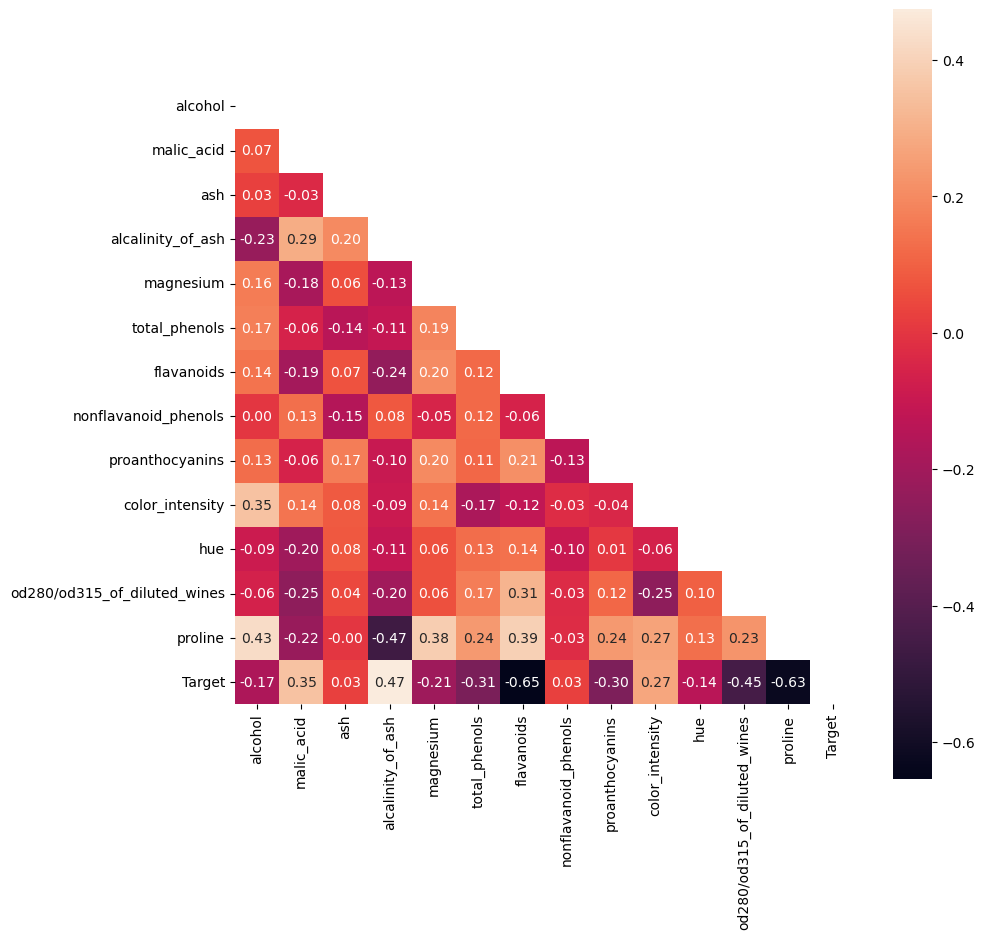

In [14]:
X_corr = X_train.corr()
mask = np.triu(np.ones_like(X_corr, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(X_corr, mask=mask, annot=True, fmt=".2f", square=True)
plt.show()

## 4. Velg en modelltype fra Sklearn med minst 3 hyperparametre og sett opp grid search og 5-folds kryss-validering

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold

modell = RandomForestClassifier(random_state=42)

parametre = {
    "n_estimators": [50, 100, 150],
    "max_depth": [ 3, 5, 7],
    "min_samples_split": [2, 5, 10]
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=modell,
    param_grid=parametre,
    cv=cv,
    scoring="accuracy",          
    verbose=1
)

grid_search.fit(X_train.iloc[:,:-2], y_train)

print("Beste parametre:", grid_search.best_params_)
print("Beste kryss-valideringsskår:", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Beste parametre: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Beste kryss-valideringsskår: 0.894949494949495


In [ ]:
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):

In [52]:
best_acc = 0
for n_estimators in [50, 100, 150]:
    for max_depth in [ 3, 5, 7]:
        for min_samples_split in [2, 5, 10]:
            cv_score = []
            for train_idx, val_idx in cv.split(X_train, y_train):
                X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
                y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]
                
                rf = RandomForestClassifier(n_estimators=n_estimators,
                                           max_depth=max_depth,
                                           min_samples_split=min_samples_split)
                
                rf.fit(X_train_cv.iloc[:,:-2],y_train_cv)
                y_hat_val_cv = rf.predict(X_val_cv.iloc[:,:-2])
                acc = accuracy_score(y_val_cv, y_hat_val_cv)
                cv_score.append(acc)
            mean_cv_score = np.asarray(cv_score).mean()
            if mean_cv_score > best_acc:
                best_acc = mean_cv_score
                print(best_acc)
                print(f"Parameters: n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}")
                

0.8496632996632997
Parameters: n_estimators=50, max_depth=3, min_samples_split=2
0.8646464646464646
Parameters: n_estimators=50, max_depth=3, min_samples_split=5
0.8725589225589226
Parameters: n_estimators=50, max_depth=5, min_samples_split=2
0.8796296296296297
Parameters: n_estimators=50, max_depth=5, min_samples_split=5
0.9025252525252525
Parameters: n_estimators=50, max_depth=7, min_samples_split=2


## 5.Tren modellen på hele treningssettet med det beste parametrene og evaluer nøyaktigheten på testdataene

In [53]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}

In [54]:
BesteModell = RandomForestClassifier(**grid_search.best_params_)

In [55]:
BesteModell.fit(X_train.iloc[:,:-2], y_train)

RandomForestClassifier(max_depth=7)

In [63]:
y_hat_test = BesteModell.predict(X_test.iloc[:,:-2])

In [64]:
accuracy_score(y_test,y_hat_test)

0.9555555555555556